# QF 600 Asset Pricing | YU Lingfeng
## `Homework 3` | Linear Factor Models

### <font color = green> Activation of necessary libraries. </font>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime

from IPython.display import display
from IPython.display import Image
import statsmodels.api as sm

import warnings

# To ignore all warnings (not recommended unless you're sure)
warnings.filterwarnings("ignore")

### <font color = "blue"> `IMPORT` dataset: `Industry_Portfolios.csv`.  and `Risk_Factors.csv` </font> 
### <font color = "blue"> Validate dataset

In [2]:
Portfolios_file = 'Industry_Portfolios.csv'
Portfolios = pd.read_csv(Portfolios_file)
Portfolios

,Date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
1,200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
2,200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
3,200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
4,200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...,...
115,201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
116,201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
117,201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87
118,201311,1.29,1.81,2.95,0.85,3.65,0.27,3.67,4.54,-1.81,4.74


In [3]:
risk_file = 'Risk_Factors.csv'
risk = pd.read_csv(risk_file)
risk

,Date,Rf,Rm-Rf,SMB,HML
0,200401,0.07,2.15,2.67,1.55
1,200402,0.06,1.40,-1.17,0.45
2,200403,0.09,-1.32,1.84,0.07
3,200404,0.08,-1.83,-2.59,-1.67
4,200405,0.06,1.17,-0.10,-0.33
...,...,...,...,...,...
115,201308,0.00,-2.69,0.29,-2.46
116,201309,0.00,3.76,2.85,-1.59
117,201310,0.00,4.17,-1.56,1.31
118,201311,0.00,3.12,1.34,-0.33


In [4]:
Portfolios.isnull().sum()

Date     0
NoDur    0
Durbl    0
Manuf    0
Enrgy    0
HiTec    0
Telcm    0
Shops    0
Hlth     0
Utils    0
Other    0
dtype: int64

In [5]:
risk.isnull().sum()

Date     0
Rf       0
Rm-Rf    0
SMB      0
HML      0
dtype: int64

In [6]:
means = Portfolios.iloc[:,1:].mean()
means.name = 'Mean Return'
means = means.to_frame()
means.T

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Mean Return,0.902833,0.733333,1.012833,1.231167,0.76625,0.881417,0.916333,0.783833,0.907167,0.489083


> Question 1: performance metrics


#### Question 1.1 Sharpe ratio


In [7]:
Rf = risk[['Rf']]
Rf

,Rf
0,0.07
1,0.06
2,0.09
3,0.08
4,0.06
...,...
115,0.00
116,0.00
117,0.00
118,0.00


In [8]:
exRm = risk['Rm-Rf']
exRm

0      2.15
1      1.40
2     -1.32
3     -1.83
4      1.17
       ... 
115   -2.69
116    3.76
117    4.17
118    3.12
119    2.81
Name: Rm-Rf, Length: 120, dtype: float64

In [9]:
exRp = pd.DataFrame()

for col in Portfolios.iloc[:,1:].columns:
    exRp[col] = Portfolios[col] - Rf['Rf']
    
exRp

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,-0.01,-1.14,-0.69,0.37,4.46,1.34,0.38,3.02,1.85,2.81
1,4.19,-0.13,1.89,4.63,-2.98,-0.58,6.03,0.83,2.01,2.10
2,-0.18,-1.24,-0.36,-0.22,-2.64,-2.16,0.20,-4.05,1.04,-0.72
3,1.34,2.22,-0.25,2.44,-4.99,-0.56,-2.78,3.46,-3.63,-3.84
4,-1.95,-1.70,1.55,0.33,4.79,-3.01,0.24,-0.48,1.22,1.80
...,...,...,...,...,...,...,...,...,...,...
115,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
116,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
117,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87
118,1.29,1.81,2.95,0.85,3.65,0.27,3.67,4.54,-1.81,4.74


In [10]:
Sharpe = pd.DataFrame(exRp.mean() / exRp.std())

Sharpe.columns = ['Sharpe Ratio']
Sharpe.T

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Sharpe Ratio,0.231099,0.072356,0.166616,0.181708,0.118552,0.169064,0.191753,0.172529,0.210948,0.064693


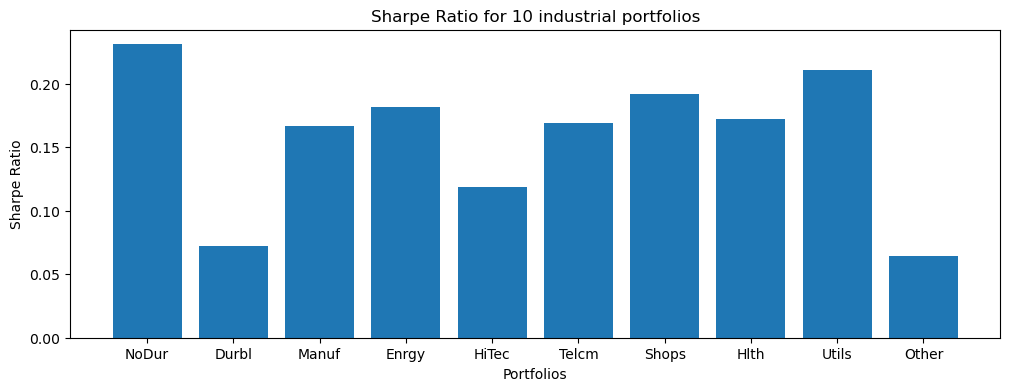

In [11]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 4))

# Create a bar chart
plt.bar(Sharpe.index, Sharpe['Sharpe Ratio'])

# Add labels and title
plt.xlabel('Portfolios')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratio for 10 industrial portfolios')

# Show the plot
plt.show()

fig.savefig("Sharpe_Ratio.png")

#### Question 1.2 Sortino ratio (using risk-free rate as target)

In [12]:
SVRp = exRp.copy()
# Set all positive values to 0
SVRp[SVRp > 0] = 0

SVRp

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,-0.01,-1.14,-0.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,-0.13,0.00,0.00,-2.98,-0.58,0.00,0.00,0.00,0.00
2,-0.18,-1.24,-0.36,-0.22,-2.64,-2.16,0.00,-4.05,0.00,-0.72
3,0.00,0.00,-0.25,0.00,-4.99,-0.56,-2.78,0.00,-3.63,-3.84
4,-1.95,-1.70,0.00,0.00,0.00,-3.01,0.00,-0.48,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
115,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
116,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
117,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
118,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.81,0.00


In [13]:
SV = pd.DataFrame(((SVRp ** 2).sum() / len(SVRp))**0.5)
SV.columns = ['SVRp']

SV

,SVRp
NoDur,2.210873
Durbl,5.413075
Manuf,3.670664
Enrgy,4.034612
HiTec,3.745156
Telcm,3.078986
Shops,2.692828
Hlth,2.429146
Utils,2.688964
Other,4.142294


In [14]:
Sortino = pd.DataFrame(exRp.mean() / SV['SVRp'])
Sortino.columns = ['Sortino Ratio']

Sortino.T

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Sortino Ratio,0.350804,0.111967,0.24126,0.273612,0.17062,0.24494,0.293032,0.270294,0.290044,0.087351


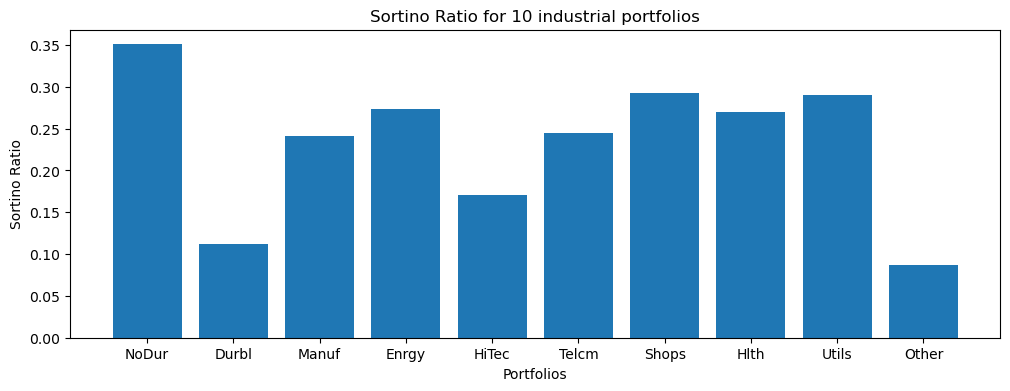

In [15]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 4))

# Create a bar chart
plt.bar(Sortino.index, Sortino['Sortino Ratio'])

# Add labels and title
plt.xlabel('Portfolios')
plt.ylabel('Sortino Ratio')
plt.title('Sortino Ratio for 10 industrial portfolios')

# Show the plot
plt.show()

fig.savefig("Sortino_Ratio.png")

#### Question 1.3 Treynor ratio (using CAPM β)

In [16]:
beta_regression = []

# Loop through the first 10 columns
for col in range(10):
    X = exRm  # Predictor variable (X is excess return from market)
    Y = exRp.iloc[:, col]  # Target variable (Y is excess return from portfolios)

    # Perform linear regression
    beta, alpha, r_value, p_value, std_err = stats.linregress(X, Y)

    # Store the regression results
    result = {
        'Asset': exRp.columns[col],
        'Beta': beta,
        'Alpha': alpha,
        'R-squared': r_value ** 2,
        'P-value': p_value,
        'Standard Error': std_err
    }
    beta_regression.append(result)

# Create a DataFrame from the regression results
beta_regression = pd.DataFrame(beta_regression)
beta_regression


,Asset,Beta,Alpha,R-squared,P-value,Standard Error
0,NoDur,0.653744,0.369717,0.718638,2.767334e-34,0.037657
1,Durbl,1.649374,-0.417903,0.734303,9.324279e-36,0.091334
2,Manuf,1.167929,0.160494,0.914464,7.602540e-65,0.032883
3,Enrgy,0.965527,0.504485,0.478370,2.216830e-18,0.092816
4,HiTec,1.132387,-0.064024,0.835923,3.900398e-48,0.046184
5,Telcm,0.901721,0.194348,0.773876,6.701703e-40,0.044871
6,Shops,0.829515,0.274093,0.769566,2.046856e-39,0.041786
7,Hlth,0.675890,0.236968,0.597388,4.601213e-25,0.051080
8,Utils,0.537009,0.446523,0.399553,9.750695e-15,0.060603
9,Other,1.206992,-0.387508,0.881987,1.366560e-56,0.040644


In [17]:
CAPM = beta_regression[['Asset','Alpha', 'Beta']].set_index('Asset').T
CAPM

Asset,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Alpha,0.369717,-0.417903,0.160494,0.504485,-0.064024,0.194348,0.274093,0.236968,0.446523,-0.387508
Beta,0.653744,1.649374,1.167929,0.965527,1.132387,0.901721,0.829515,0.675890,0.537009,1.206992


In [18]:
Treynor = pd.DataFrame(exRp.mean() / CAPM.loc['Beta'])
Treynor.columns = ['Treynor Ratio']

Treynor.T

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Treynor Ratio,1.186372,0.367463,0.758251,1.14333,0.564295,0.836363,0.951258,0.971435,1.452334,0.299781


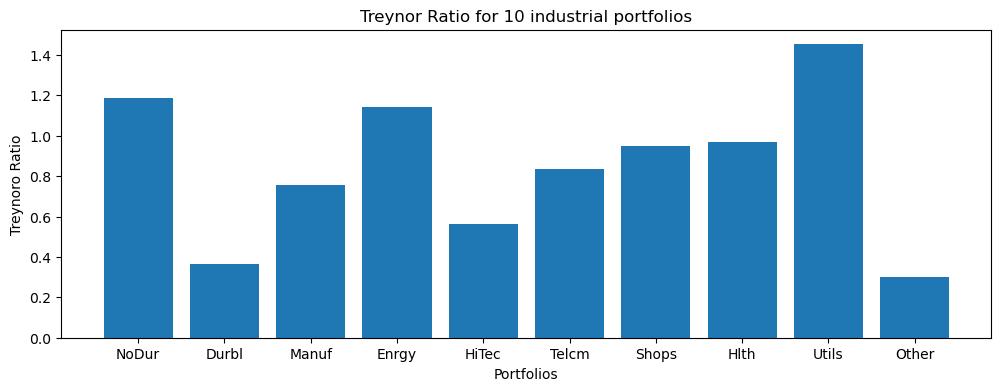

In [19]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 4))

# Create a bar chart
plt.bar(Treynor.index, Treynor['Treynor Ratio'])

# Add labels and title
plt.xlabel('Portfolios')
plt.ylabel('Treynoro Ratio')
plt.title('Treynor Ratio for 10 industrial portfolios')

# Show the plot
plt.show()

fig.savefig("Treynor_Ratio.png")

#### Question 1.4 Jensen's α


In [20]:
Jensen_a = CAPM.loc[['Alpha']]
Jensen_a

Asset,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Alpha,0.369717,-0.417903,0.160494,0.504485,-0.064024,0.194348,0.274093,0.236968,0.446523,-0.387508


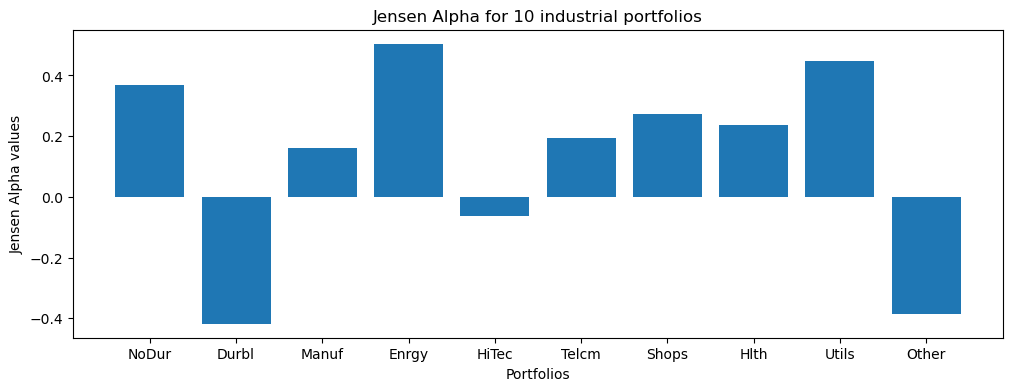

In [32]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 4))

# Create a bar chart
plt.bar(Jensen_a.columns, Jensen_a.iloc[0,:])

# Add labels and title
plt.xlabel('Portfolios')
plt.ylabel('Jensen Alpha values')
plt.title('Jensen Alpha for 10 industrial portfolios')

# Show the plot
plt.show()

fig.savefig("Jensen_alpha.png")

#### Question 1.5 Three-factor α

In [21]:
# base on Fama, exRP = f(exRm, SMB, HML)
Fama_regression = []

for col in range(10):

    # Define the independent variables (X) and the dependent variable (Y)
    X = risk[['Rm-Rf','SMB', 'HML']]
    X['alpha'] = 1
    Y = exRp.iloc[:, col]

    # Fit the multivariate linear regression model
    model = sm.OLS(Y, X).fit()

    # Accessing the coefficients (slopes) for each independent variable
    Bm_f = model.params['Rm-Rf']
    Rs_b = model.params['SMB']
    Dh_l = model.params['HML']

    # Accessing the intercept (if there is one)
    Fama_alpha = model.params['alpha']
    Fama_regression.append([Bm_f,Rs_b, Dh_l, Fama_alpha])
    
# Create a DataFrame from the regression results
Fama_regression = pd.DataFrame(Fama_regression)
Fama_regression.columns = ['Beta', 'SMB', 'HML', '3F Alpha']
Fama_regression['Asset'] = exRp.columns.tolist()
Fama_regression = Fama_regression.set_index('Asset')
Fama_regression


,Beta,SMB,HML,3F Alpha
Asset,,,,
NoDur,0.712134,-0.229102,-0.023342,0.386704
Durbl,1.447452,0.670878,0.240949,-0.474342
Manuf,1.142282,0.087388,0.027727,0.153285
Enrgy,1.028354,-0.259360,-0.008158,0.523007
HiTec,1.152803,0.335674,-0.556947,-0.065979
Telcm,0.924137,-0.080299,-0.019063,0.200724
Shops,0.770227,0.280191,-0.039080,0.255941
Hlth,0.751976,-0.212655,-0.143765,0.257472
Utils,0.631827,-0.387961,-0.016881,0.474411


In [22]:
Fama_a = Fama_regression[['3F Alpha']]
Fama_a.T

Asset,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
3F Alpha,0.386704,-0.474342,0.153285,0.523007,-0.065979,0.200724,0.255941,0.257472,0.474411,-0.404412


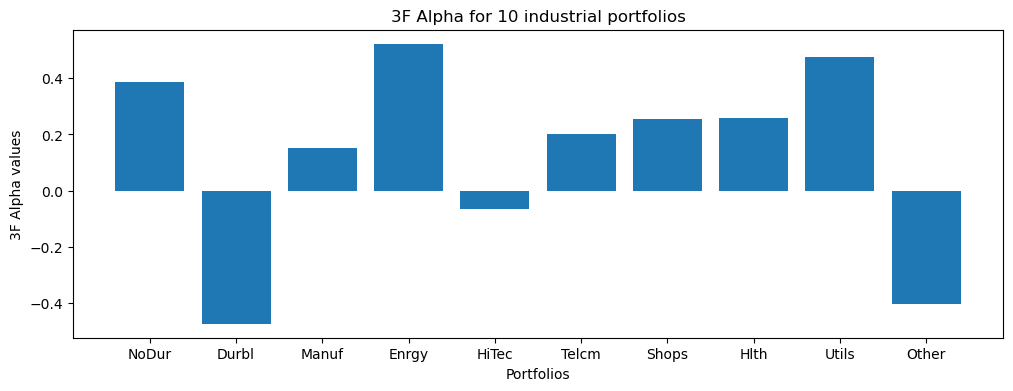

In [30]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 4))

# Create a bar chart
plt.bar(Fama_a.index, Fama_a['3F Alpha'])

# Add labels and title
plt.xlabel('Portfolios')
plt.ylabel('3F Alpha values')
plt.title('3F Alpha for 10 industrial portfolios')

# Show the plot
plt.show()

fig.savefig("Fama_alpha.png")

In [23]:
Sortino

,Sortino Ratio
NoDur,0.350804
Durbl,0.111967
Manuf,0.241260
Enrgy,0.273612
HiTec,0.170620
Telcm,0.244940
Shops,0.293032
Hlth,0.270294
Utils,0.290044
Other,0.087351


In [24]:
Table=pd.DataFrame()
Table = pd.concat([Sharpe, Sortino], axis = 1)
Table = pd.concat([Table, Treynor], axis = 1)
Table = pd.concat([Table, Jensen_a.T], axis = 1)
Table = pd.concat([Table, Fama_a], axis = 1)

Table

,Sharpe Ratio,Sortino Ratio,Treynor Ratio,Alpha,3F Alpha
NoDur,0.231099,0.350804,1.186372,0.369717,0.386704
Durbl,0.072356,0.111967,0.367463,-0.417903,-0.474342
Manuf,0.166616,0.241260,0.758251,0.160494,0.153285
Enrgy,0.181708,0.273612,1.143330,0.504485,0.523007
HiTec,0.118552,0.170620,0.564295,-0.064024,-0.065979
Telcm,0.169064,0.244940,0.836363,0.194348,0.200724
Shops,0.191753,0.293032,0.951258,0.274093,0.255941
Hlth,0.172529,0.270294,0.971435,0.236968,0.257472
Utils,0.210948,0.290044,1.452334,0.446523,0.474411
Other,0.064693,0.087351,0.299781,-0.387508,-0.404412


## QF 600 Asset Pricing | YU Lingfeng
### `Homework 3` | Linear Factor Models | `Submission 2`

> Question 1: performance metrics

In [25]:
Table

,Sharpe Ratio,Sortino Ratio,Treynor Ratio,Alpha,3F Alpha
NoDur,0.231099,0.350804,1.186372,0.369717,0.386704
Durbl,0.072356,0.111967,0.367463,-0.417903,-0.474342
Manuf,0.166616,0.241260,0.758251,0.160494,0.153285
Enrgy,0.181708,0.273612,1.143330,0.504485,0.523007
HiTec,0.118552,0.170620,0.564295,-0.064024,-0.065979
Telcm,0.169064,0.244940,0.836363,0.194348,0.200724
Shops,0.191753,0.293032,0.951258,0.274093,0.255941
Hlth,0.172529,0.270294,0.971435,0.236968,0.257472
Utils,0.210948,0.290044,1.452334,0.446523,0.474411
Other,0.064693,0.087351,0.299781,-0.387508,-0.404412


#### Question 1.1 Sharpe ratio

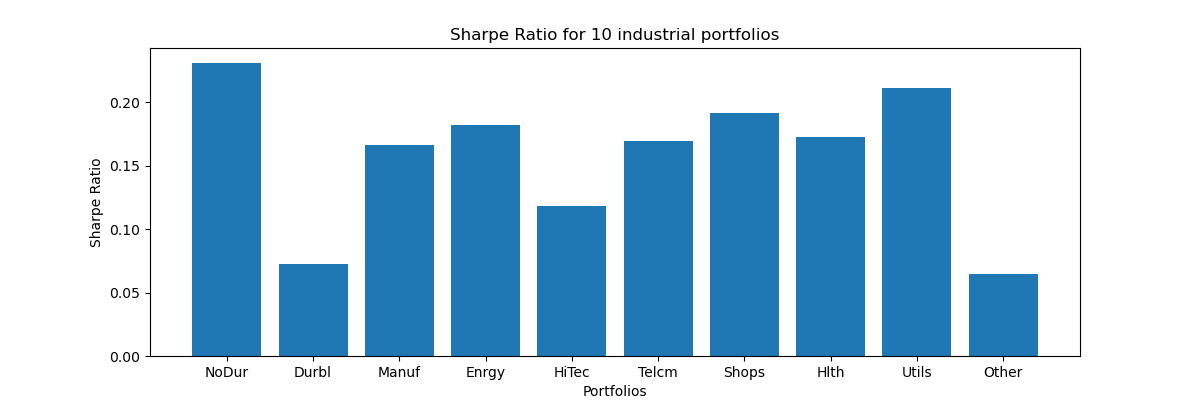

In [26]:
display(Image(filename="Sharpe_Ratio.png"))

#### Question 1.2 Sortino ratio (using risk-free rate as target)

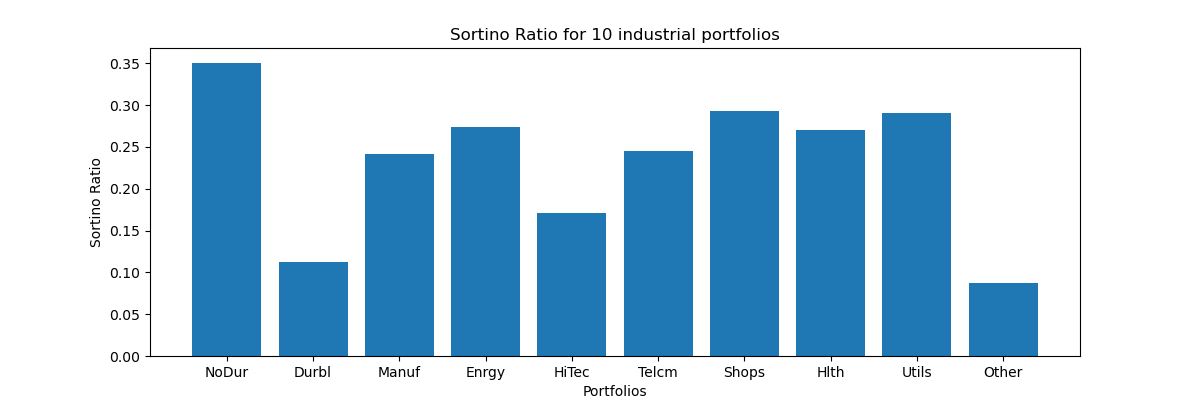

In [27]:
display(Image(filename="Sortino_Ratio.png"))

#### Question 1.3 Treynor ratio (using CAPM β)

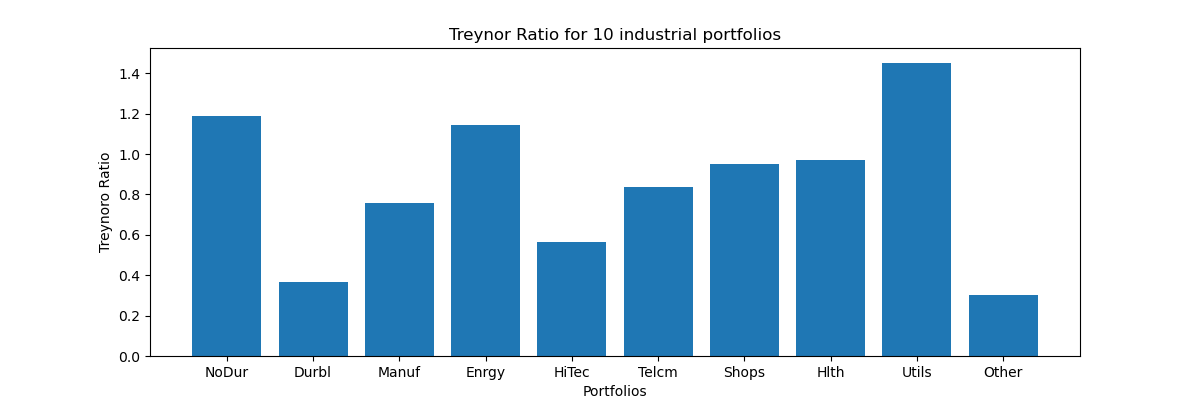

In [28]:
display(Image(filename="Treynor_Ratio.png"))

> Question 2 Briefly explain the economic significance of each of the three
performance ratios

#### Question 2.1 Sharpe Ratio

#### measures risk premium per unit of standard deviation. The denominatoro captures total risk, i.e., both systematic and idiosyncratic risk. If calculated on not well diversified portfolios, the limitations would be:
#### 1. Idiosyncratic risk will increase denominator, thus reduce Sharpe Ratio, and making it biased.
#### 2. For non-normal return distribution, denominator ignores skewness and kurtosis, so may not fully reflect risk of investment

#### Question 2.2 Sortino Ratio

####  Sortino Ratio measures expected deviation from target (or benchmark) return, per unit of below-target semi-deviation. As investors tends to be "loss-adverse" rather simple risk-adverse, Sortino Ratio especially captures differece in skewness of return distribution, and emphasize on the unfavored "Left Tail" characters. So it is more informative than information ratio or Sharpe ratio when return distribution is not normal.

#### Question 2.3 Treynor ratio

#### Treynor ratio measures expected deviation from target (or benchmark) return, per unit of tracking error. Treynor ratio ignores idiosyncratic risk, and captures systematic (market) risk only. Measures the risk adjusted return. But only measured on market risk, but not idiosyncratic, or systematic risk. In theory, there is no other risk than market. However, in practice this belief is not always true.
#### In principle, can be used to compare performance of individual investment to diversified portfolio. In practice, Treynor ratio will fail to account for other types of systematic risk besides market risk, say a commonly seen "Size risk".
#### Treynor ratio is supposed to be a positive number. The lager Treynor ratio is, the more attractive the portfolio becomes. A negative Treynor ratio basically means the portfolio is performing worse than the risk less asset, which might be happening during short term systematic risk period.